In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [3]:
run_id = 'Algorithm1_apple_etc'

In [4]:
os.mkdir(run_id)

In [5]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [58]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [59]:
predict = DataLoader('F', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [60]:
predict_req, real = data_prep(predict, 20, 5) # dividing data into predictor input and real data

### Individual predictor forecasts

In [61]:
individual_predictors_forecasts = individual_predictors_pretrained_Ford_5_2(predict_req, 5)

### System disagreement between individual predictor forecasts

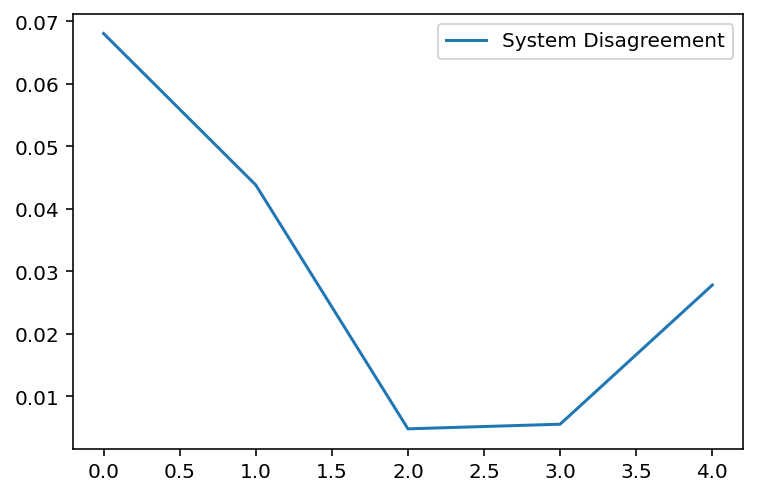

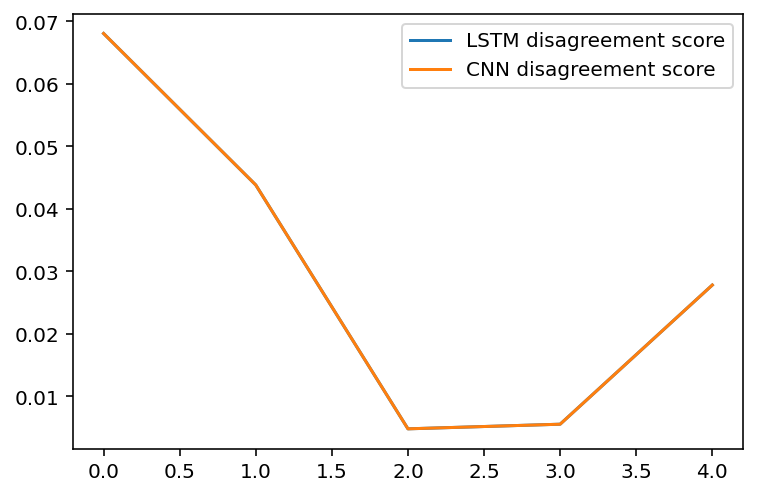

In [62]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [63]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [64]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [65]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,LSTM,CNN,System Disagreement,LSTM disagreement score,CNN disagreement score
Date,,,,,,,,,,,
2018-03-02,9.205348,9.205348,9.205348,9.205348,9.392568,9.166625,9.137268,9.273428,0.068080,0.068080,0.068080
2018-03-05,9.158988,9.134055,9.146521,9.115152,9.102671,9.325278,9.115152,9.202824,0.043836,0.043836,0.043836
2018-03-06,9.210495,9.209229,9.210984,9.205691,9.194357,9.369350,9.215300,9.205691,0.004804,0.004804,0.004804
2018-03-07,9.135739,9.135907,9.136204,9.141284,9.189586,9.369350,9.141284,9.130195,0.005545,0.005545,0.005545
2018-03-08,9.181817,9.181156,9.179818,9.153999,9.300811,9.351720,9.153999,9.209634,0.027817,0.027817,0.027817


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [66]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,System Disagreement
Date,,,,,,,,,,
2018-03-02,0.029357,0.106803,0.038723,0.038723,0.038723,0.038723,0.225943,0.068080,0.068080,0.068080
2018-03-05,0.210126,0.122455,0.166290,0.191223,0.178757,0.210126,0.222607,0.043836,0.043836,0.043836
2018-03-06,0.154051,0.163659,0.158855,0.160121,0.158366,0.163659,0.174993,0.004804,0.004804,0.004804
2018-03-07,0.228066,0.239156,0.233611,0.233443,0.233146,0.228066,0.179764,0.005545,0.005545,0.005545
2018-03-08,0.197721,0.142086,0.169903,0.170564,0.171901,0.197721,0.050908,0.027817,0.027817,0.027817


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,System Disagreement
LSTM absolute error,1.000000,0.595504,0.956755,0.980417,0.973737,0.999208,-0.375826,-0.684786,-0.684786,-0.684786
CNN absolute error,0.595504,1.000000,0.797971,0.722057,0.757658,0.605005,-0.136337,-0.816587,-0.816587,-0.816587
Average absolute error,0.956755,0.797971,1.000000,0.988700,0.997013,0.961752,-0.342492,-0.832230,-0.832230,-0.832230
NoMemory absolute error,0.980417,0.722057,0.988700,1.000000,0.997125,0.983964,-0.274489,-0.769381,-0.769381,-0.769381
Memory absolute error,0.973737,0.757658,0.997013,0.997125,1.000000,0.977591,-0.319246,-0.798525,-0.798525,-0.798525
Focus absolute error,0.999208,0.605005,0.961752,0.983964,0.977591,1.000000,-0.370707,-0.708421,-0.708421,-0.708421
Anchor absolute error,-0.375826,-0.136337,-0.342492,-0.274489,-0.319246,-0.370707,1.000000,0.361078,0.361078,0.361078
LSTM disagreement score,-0.684786,-0.816587,-0.832230,-0.769381,-0.798525,-0.708421,0.361078,1.000000,1.000000,1.000000
CNN disagreement score,-0.684786,-0.816587,-0.832230,-0.769381,-0.798525,-0.708421,0.361078,1.000000,1.000000,1.000000
System Disagreement,-0.684786,-0.816587,-0.832230,-0.769381,-0.798525,-0.708421,0.361078,1.000000,1.000000,1.000000


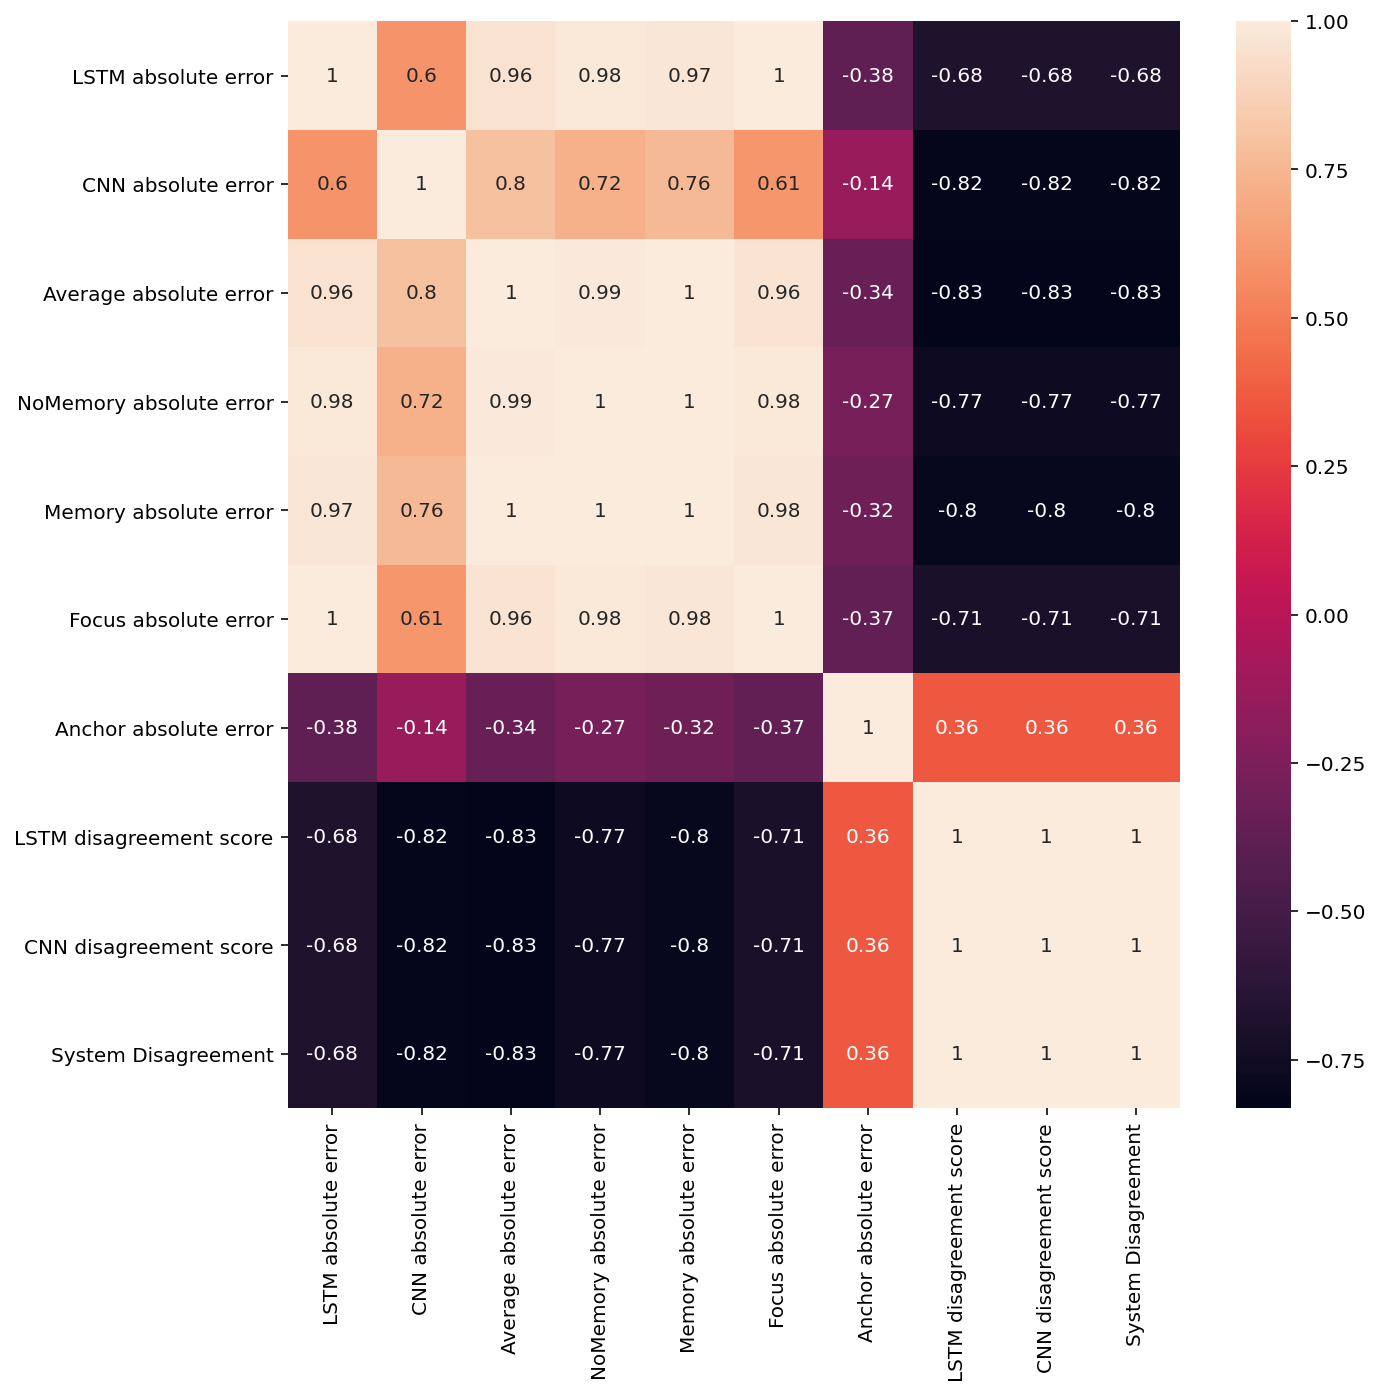

In [67]:
correlation_ = correlation(prediction_error, True)
correlation_

In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,0.027566
1,NoMemory,0.029458
2,Memory,0.028488
3,Focus,0.032709
4,Anchor,0.033227
5,LSTM,0.031971
6,CNN,0.026114


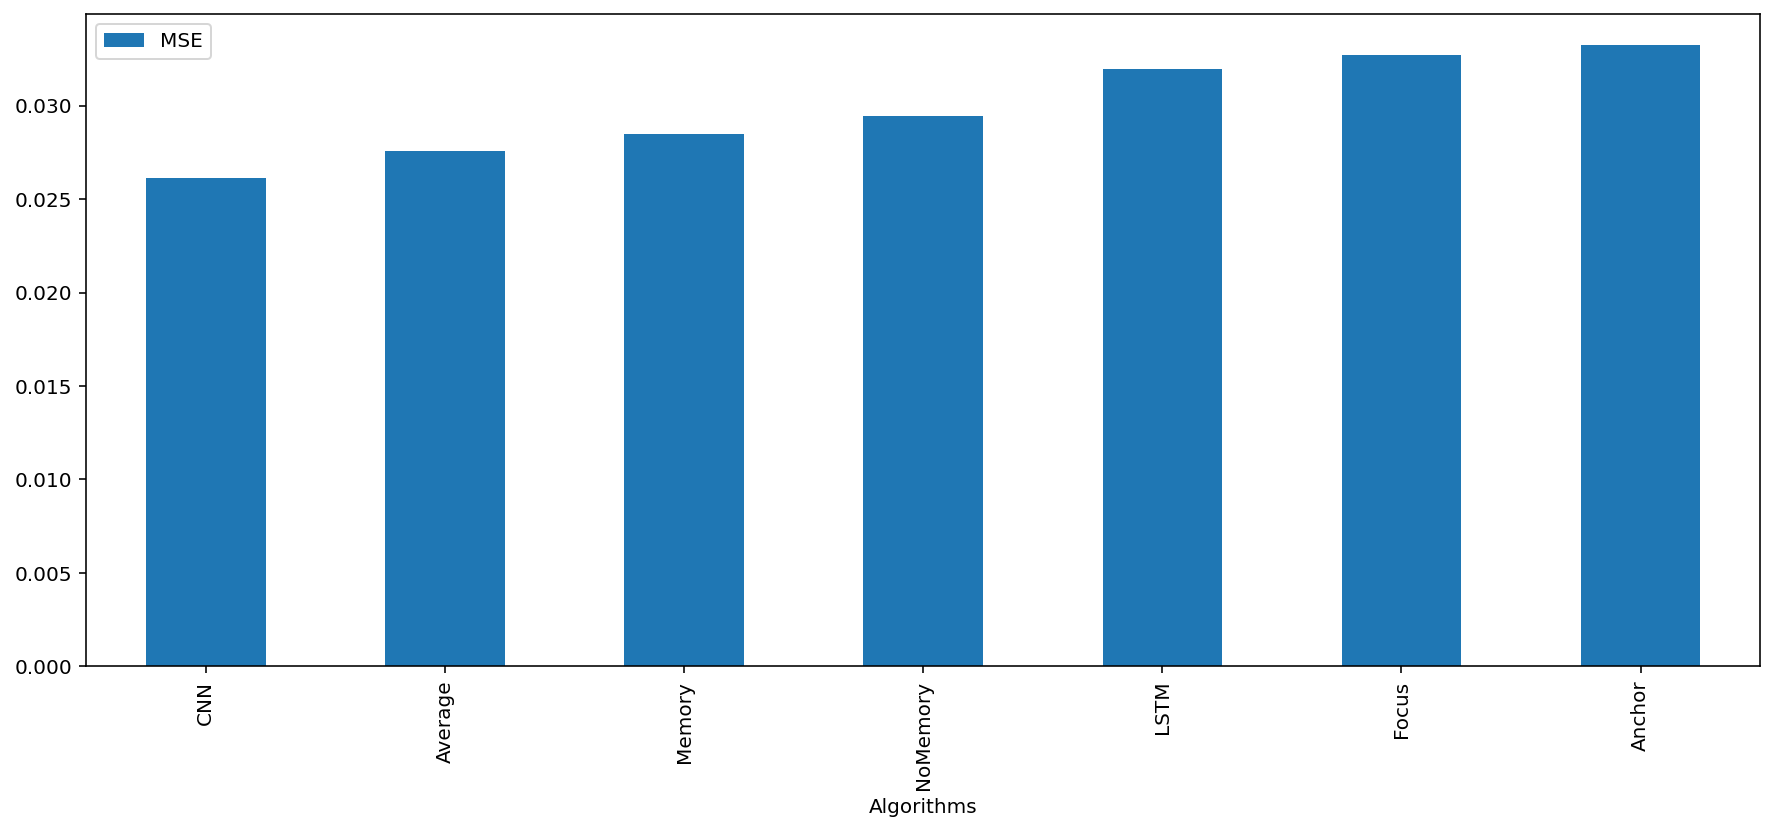

In [68]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.041866
1,NoMemory,0.009688
2,Memory,0.013283
3,Focus,0.009897
4,Anchor,0.121534
5,LSTM,0.145925
6,CNN,0.000244


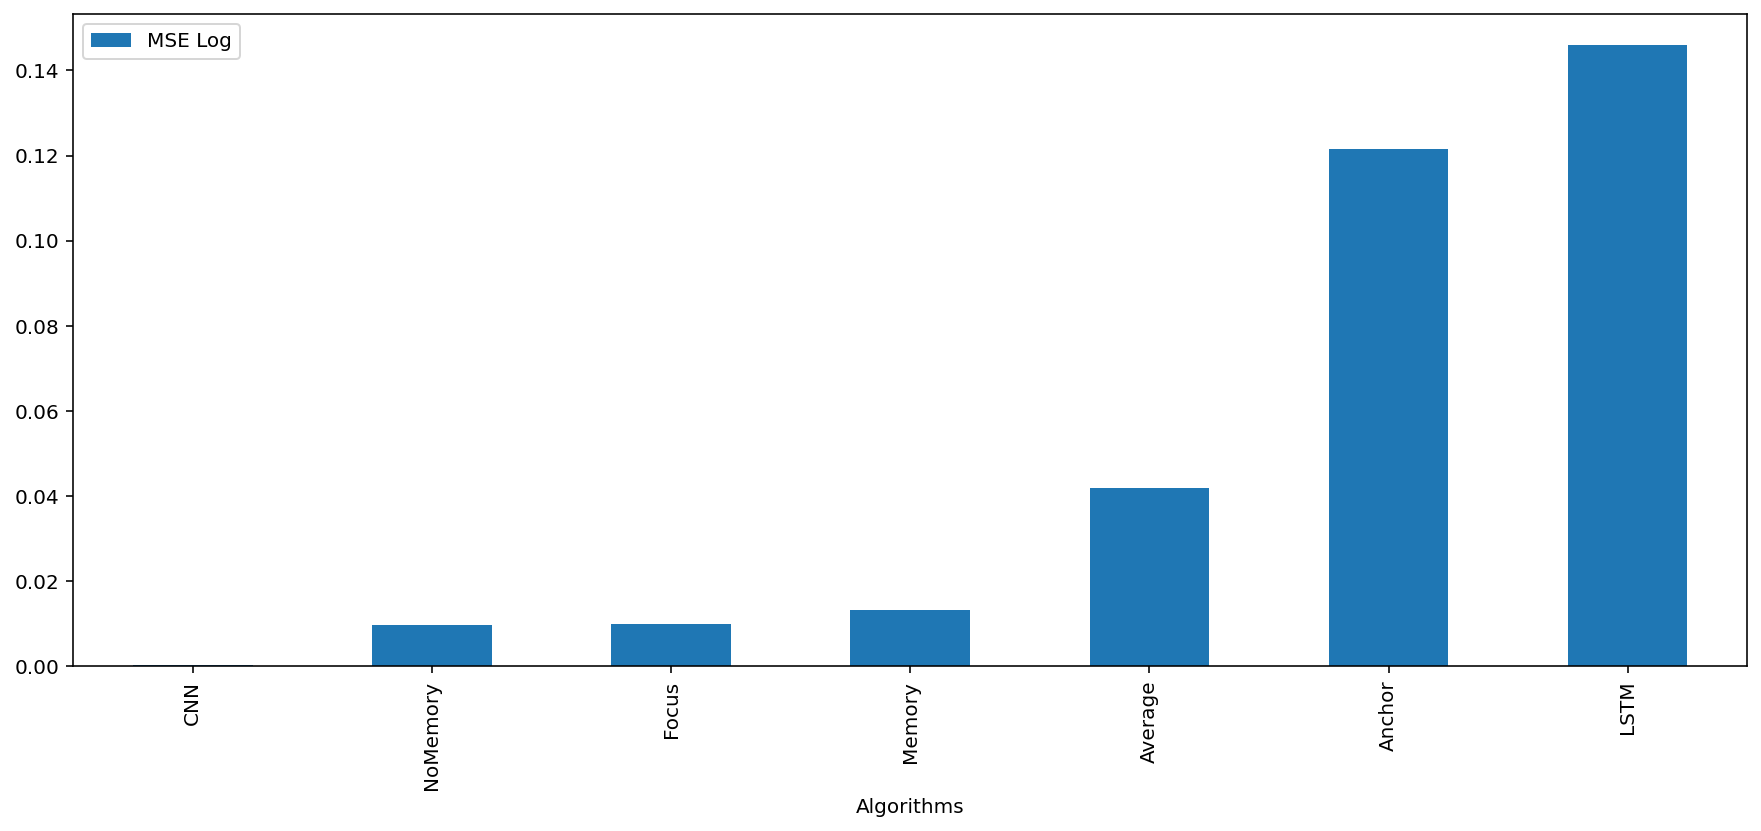

In [55]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,9.744635
1,NoMemory,2.329552
2,Memory,4.356705
3,Focus,2.709476
4,Anchor,15.140222
5,LSTM,20.053531
6,CNN,0.586306


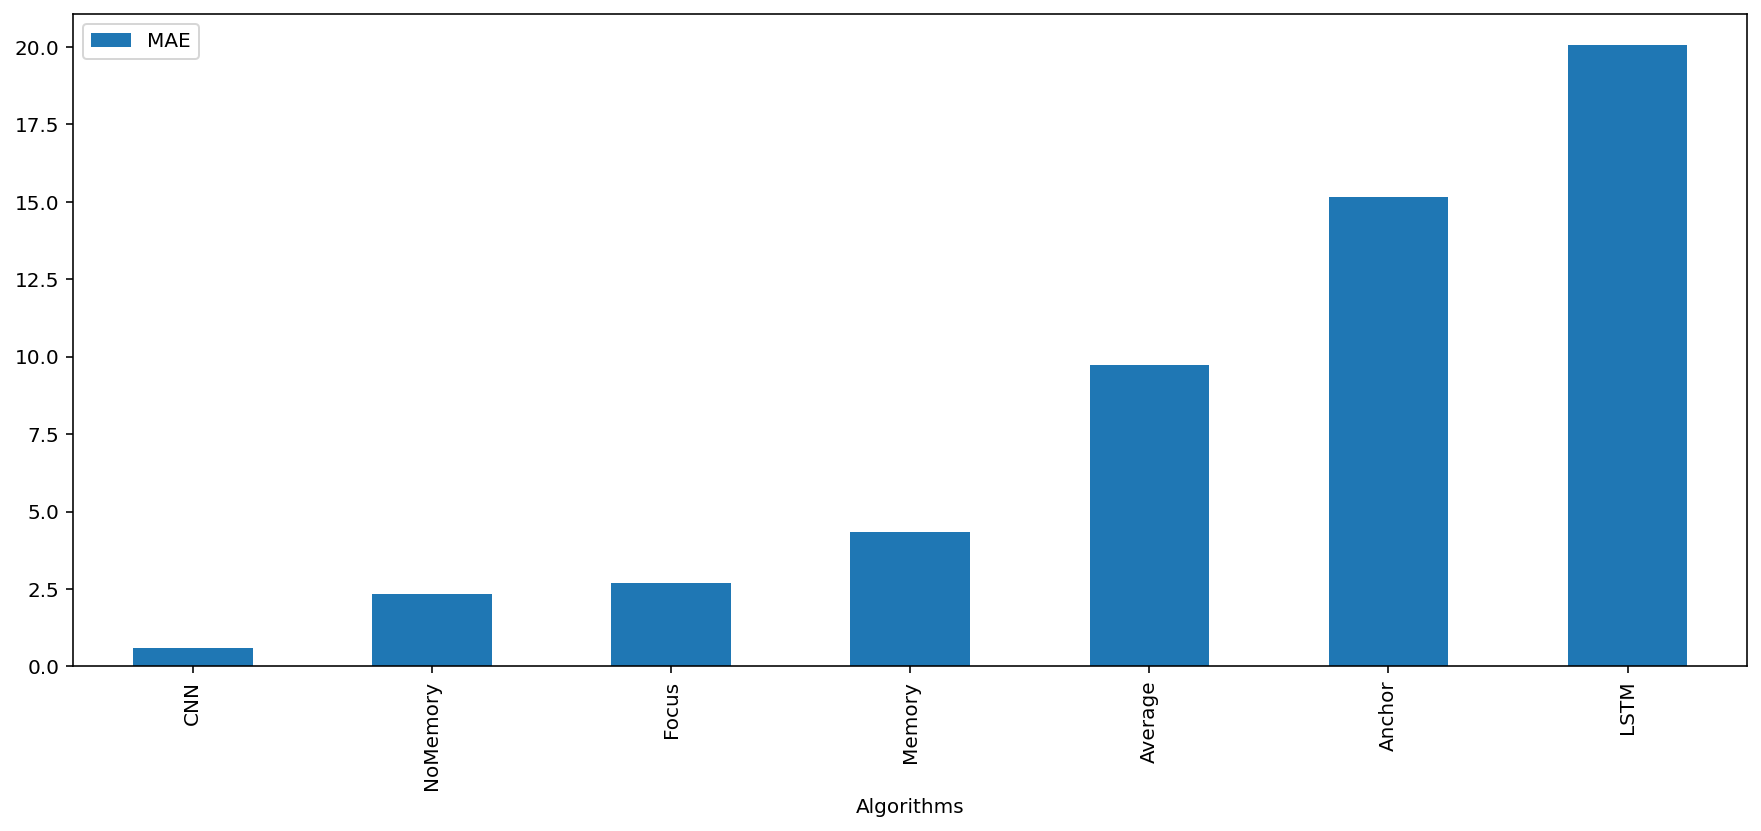

In [56]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

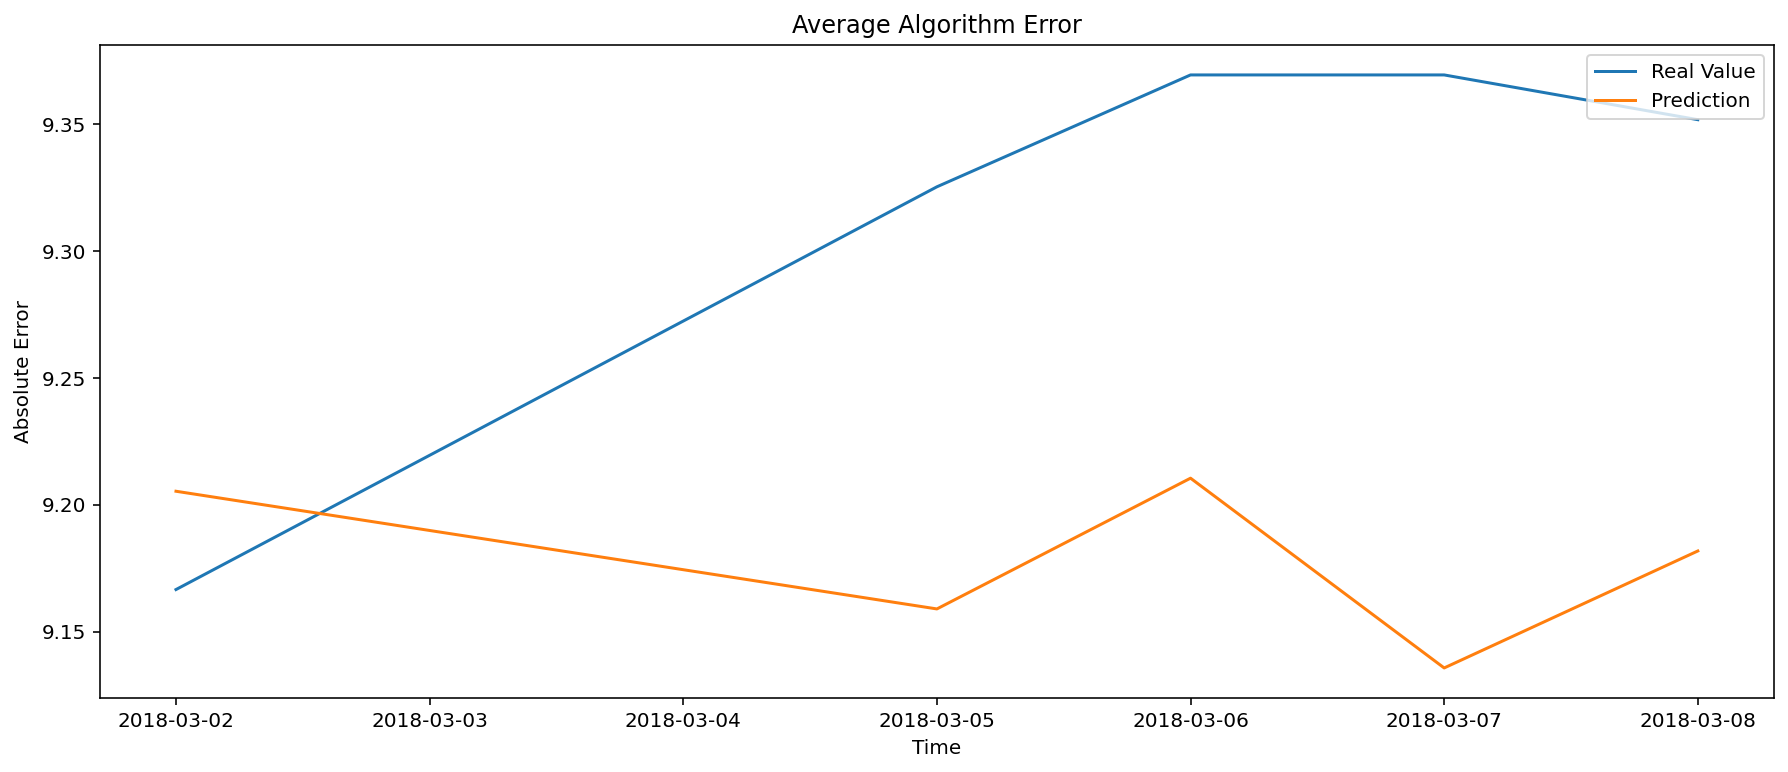

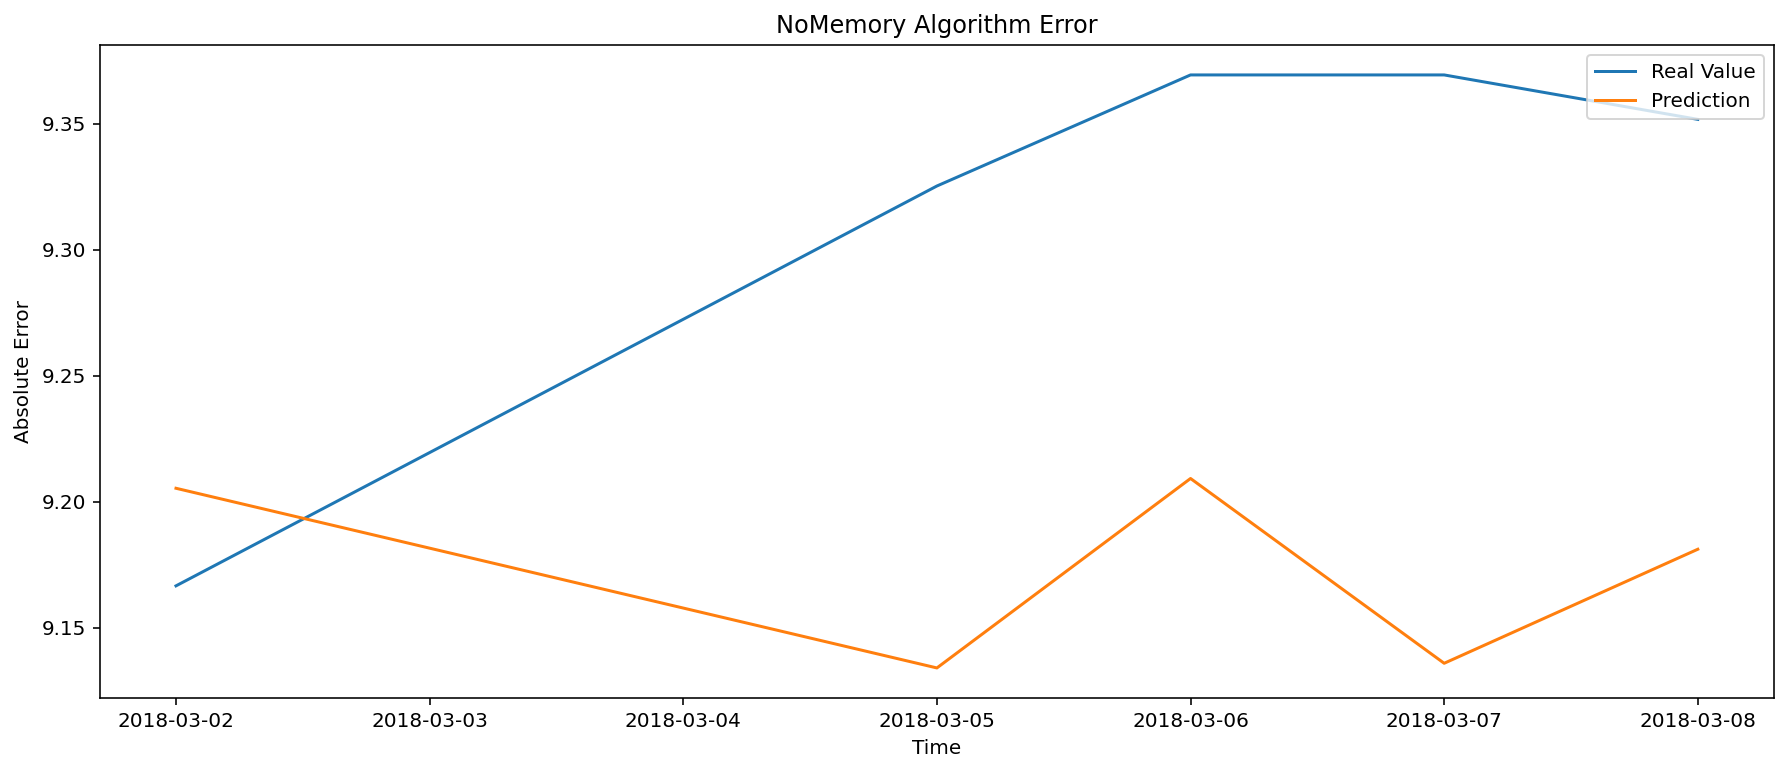

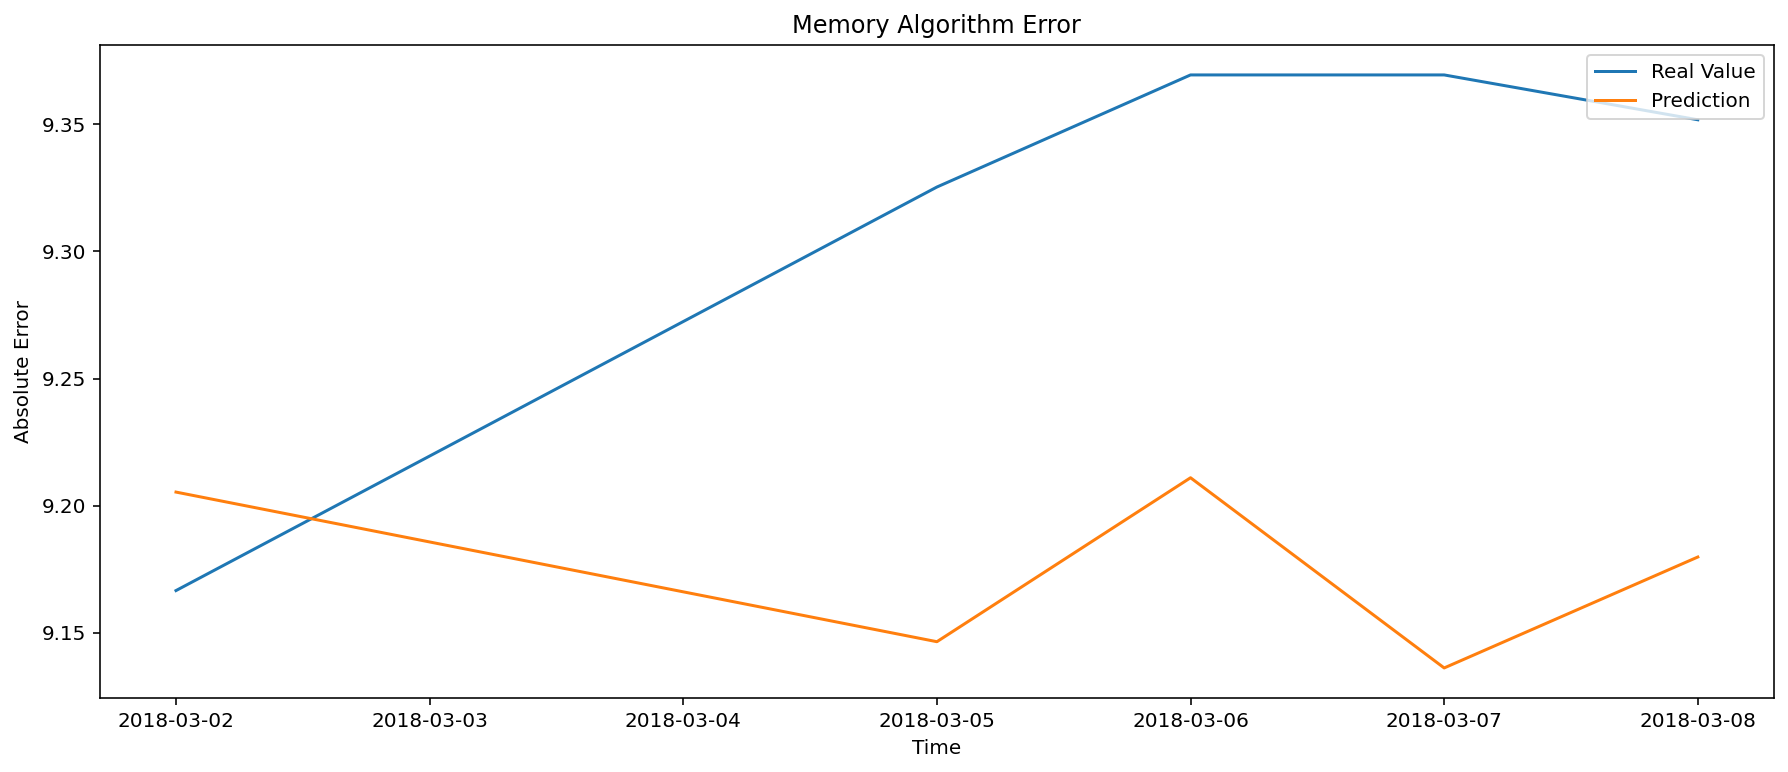

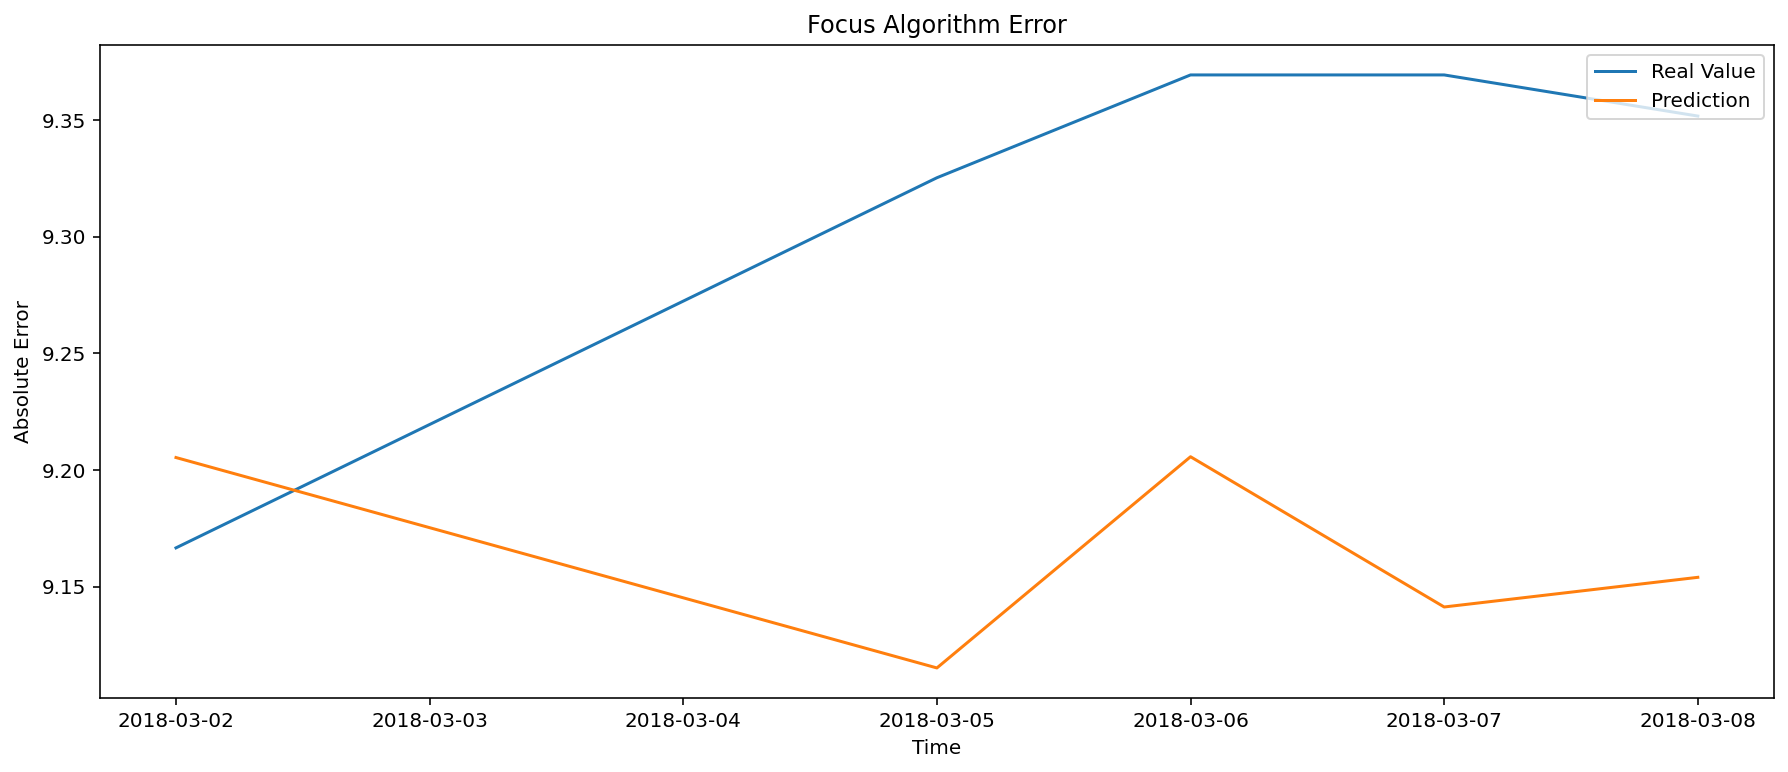

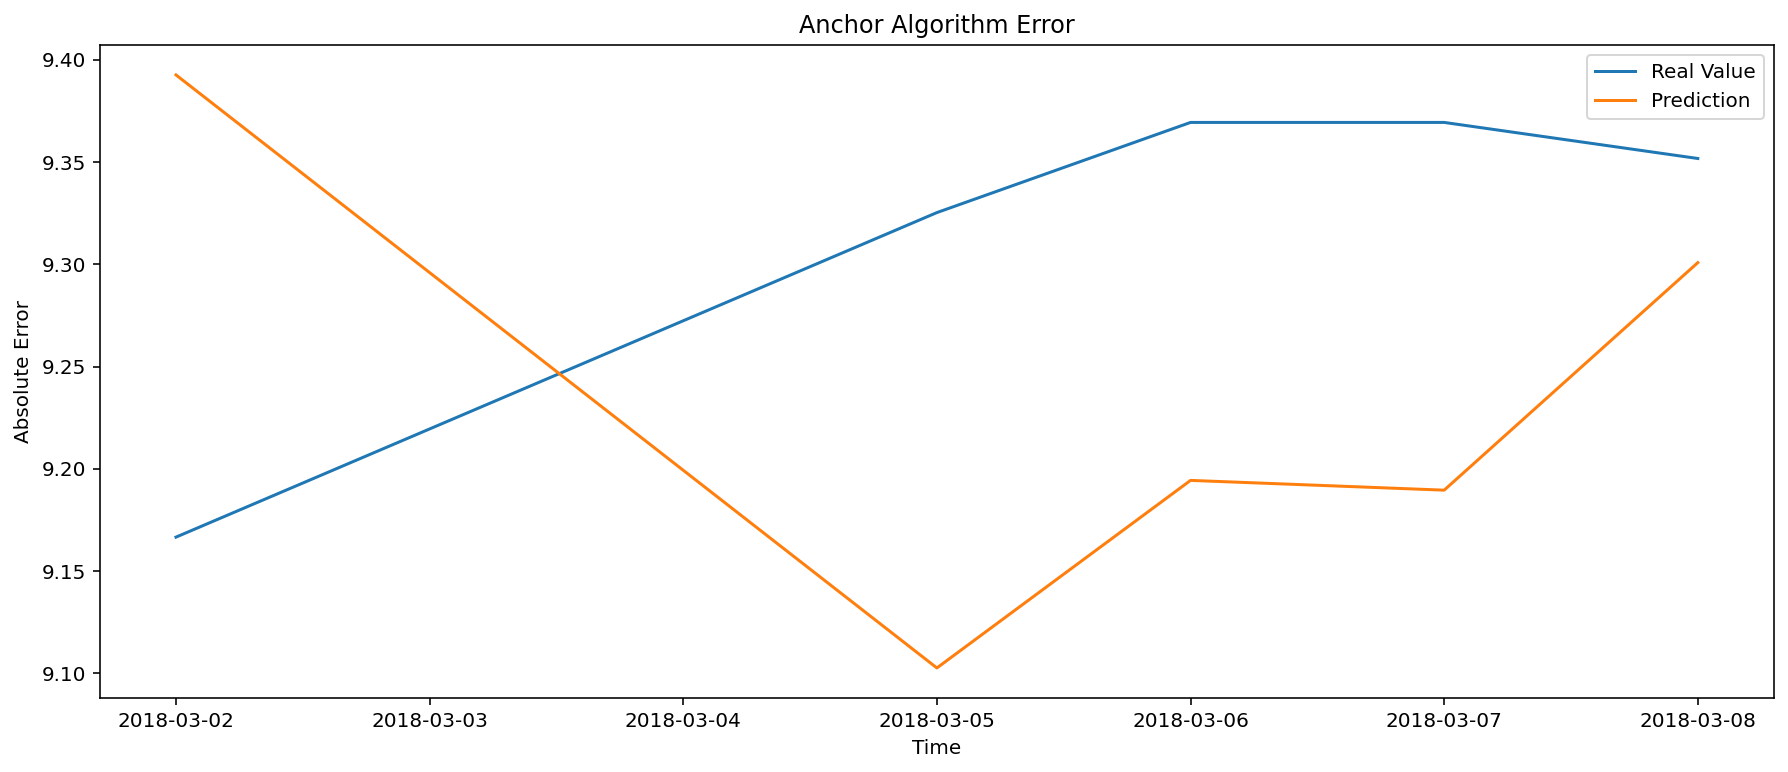

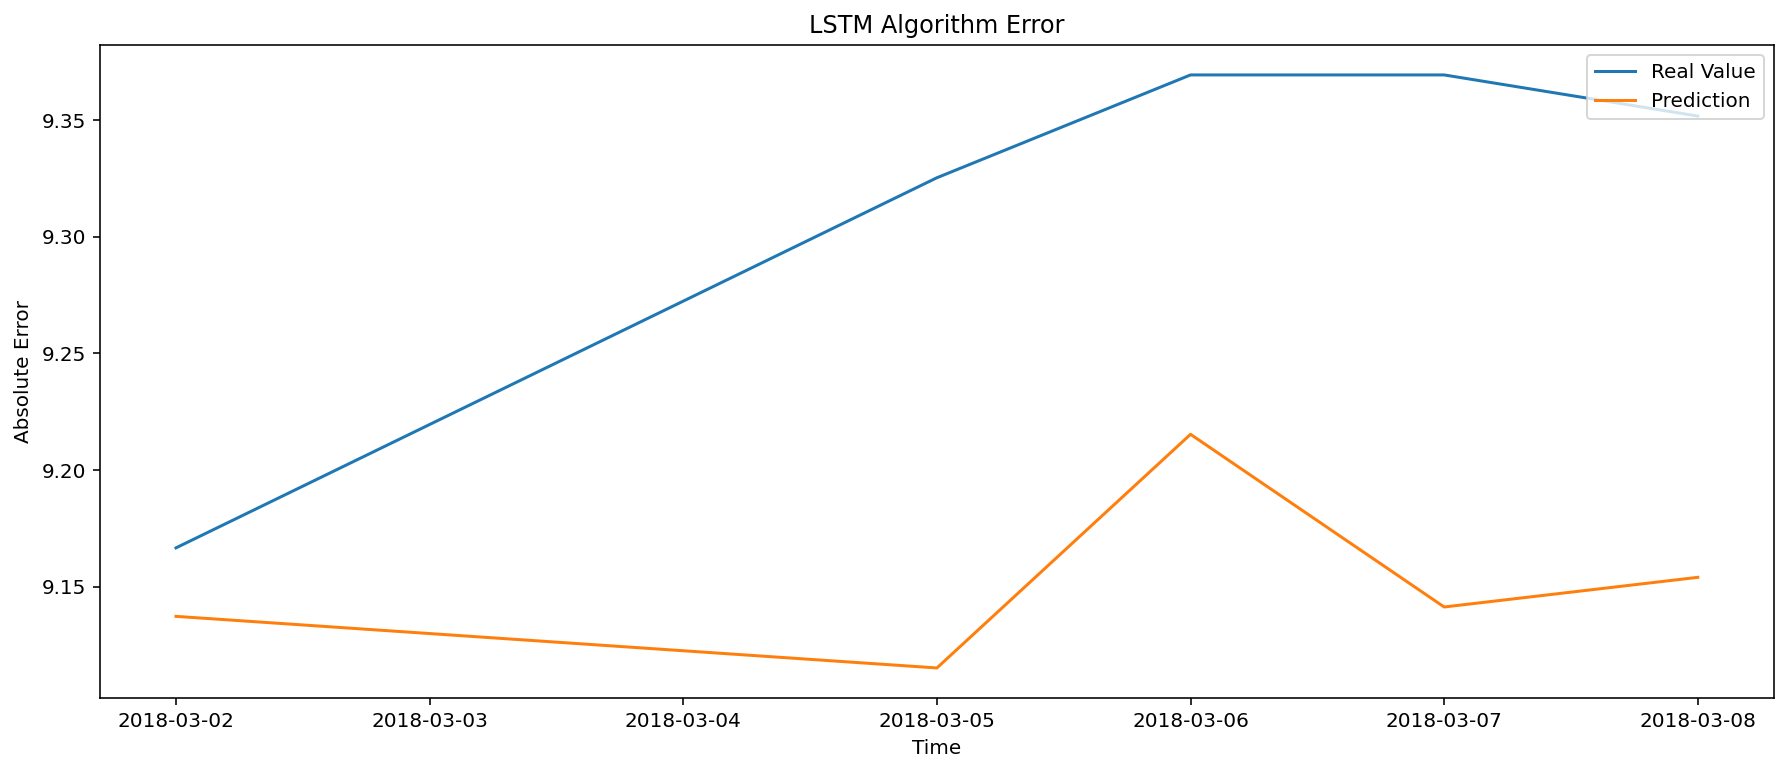

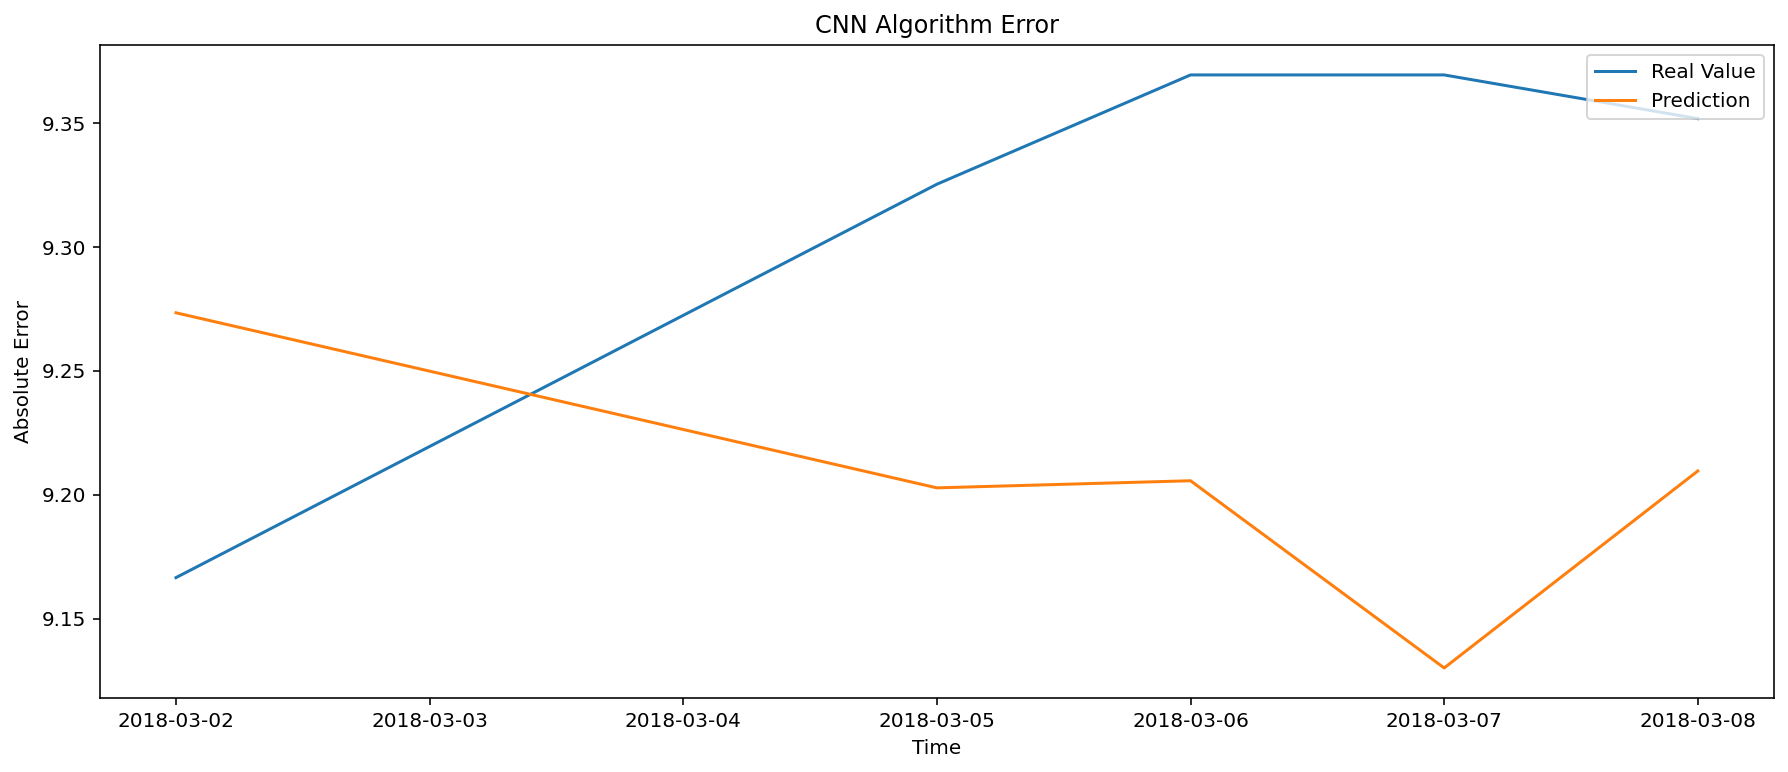

In [69]:
plot_performance(all_forecasts)